# Multiple Linear Regression

## Grading the Professor

Many college courses conclude by giving students the opportunity to evaluate the course and the instructor anonymously. However, the use of these student evaluations as an indicator of course quality and teaching effectiveness is often criticized because these measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor. The article titled, "Beauty in the classroom: instructors' pulchritude and putative pedagogical productivity" found that instructors who are viewed to be better looking receive higher instructional ratings.

Reference: https://www.sciencedirect.com/science/article/abs/pii/S0272775704001165

In this lab we will analyze the data from this study in order to learn what goes into a positive professor evaluation.

<img src="images/ProfessorStudents.jpg"/>

## The Data

The data were gathered from end of semester student evaluations for a large sample of professors from the University of Texas at Austin. In addition, six students rated the professors' physical appearance. (This is a slightly modified version of the original data set that was released as part of the replication data for *Data Analysis Using Regression and Multilevel/Hierarchical Models*) The result is a data frame where each row contains a different course and columns represent variables about the courses and professors.

variable         | description
---------------- | -----------
`score`          | average professor evaluation score: (1) very unsatisfactory - (5) excellent.
`rank`           | rank of professor: teaching, tenure track, tenured.
`ethnicity`      | ethnicity of professor: not minority, minority.
`gender`         | gender of professor: female, male.
`language`       | language of school where professor received education: english or non-english.
`age`            | age of professor.
`cls_perc_eval`  | percent of students in class who completed evaluation.
`cls_did_eval`   | number of students in class who completed evaluation.
`cls_students`   | total number of students in class.
`cls_level`      | class level: lower, upper.
`cls_profs`      | number of professors teaching sections in course in sample: single, multiple.
`cls_credits`    | number of credits of class: one credit (lab, PE, etc.), multi credit.
`bty_f1lower`    | beauty rating of professor from lower level female: (1) lowest - (10) highest.
`bty_f1upper`    | beauty rating of professor from upper level female: (1) lowest - (10) highest.
`bty_f2upper`    | beauty rating of professor from second upper level female: (1) lowest - (10) highest.
`bty_m1lower`    | beauty rating of professor from lower level male: (1) lowest - (10) highest.
`bty_m1upper`    | beauty rating of professor from upper level male: (1) lowest - (10) highest.
`bty_m2upper`    | beauty rating of professor from second upper level male: (1) lowest - (10) highest.
`bty_avg`        | average beauty rating of professor.
`pic_outfit`     | outfit of professor in picture: not formal, formal.
`pic_color`      | color of professor's picture: color, black & white.

### Load Libraries

In [1]:
#install.packages("package")
#library(tidyr)
library(statsr)
library(dplyr)
library(ggplot2)
library(GGally)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### Load Data

In [2]:
data(evals)
head(evals)

score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,⋯,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,⋯,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>
4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,⋯,multi credit,5,7,6,2,4,6,5,not formal,color
4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,⋯,multi credit,4,4,2,2,3,3,3,not formal,color
4.3,tenured,not minority,male,english,59,87.50000,35,40,upper,⋯,multi credit,4,4,2,2,3,3,3,not formal,color


**1. Is this an observational study or an experiment?**

    Answer: Observational study

**2. The original research question posed in the paper is whether beauty leads directly to the differences in course evaluations.  Given the study design, should the question be rephrased? If so, how?**

    Answer: Yes, revise wording to "Is there an association between beauty and course evaluations?"

### Exploring the Data

**3. Which of the following statements is `TRUE` about the distribution of `score`?**

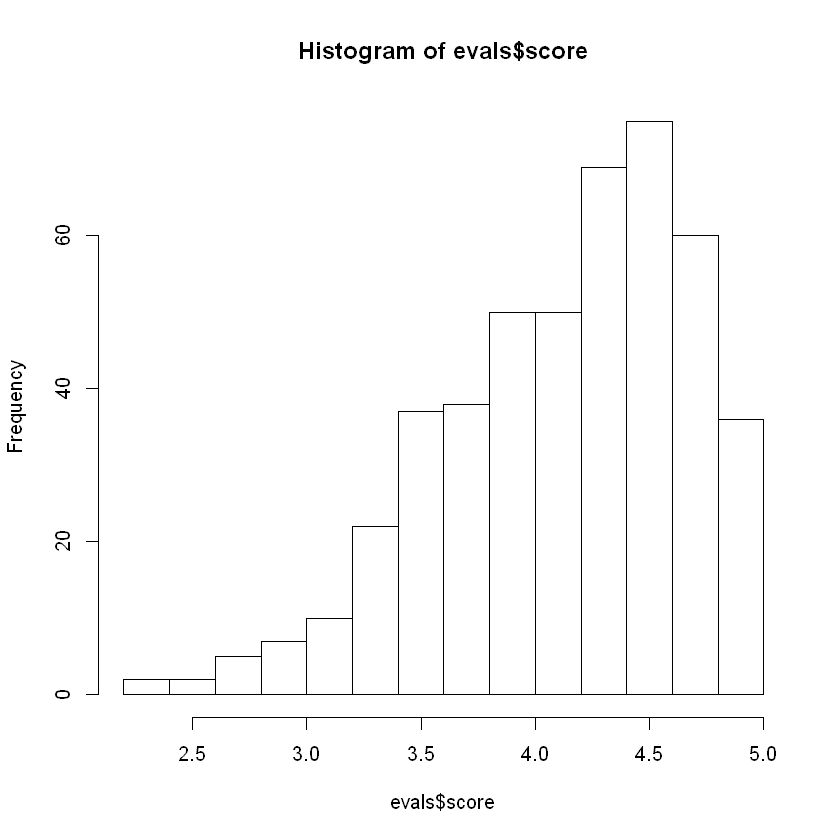

In [3]:
hist(evals$score)

In [4]:
summary(evals$score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.300   3.800   4.300   4.175   4.600   5.000 

Answer:

    The median of the distribution is 4.3.
    25% of the students gave their professors a score of over 4.6.
    11 of students gave a professor a score below 3.

**Exercise:** Excluding `score`, select two other variables and describe their relationship using an appropriate visualization (scatterplot, side-by-side boxplots, or mosaic plot).

`geom_smooth()` using formula 'y ~ x'



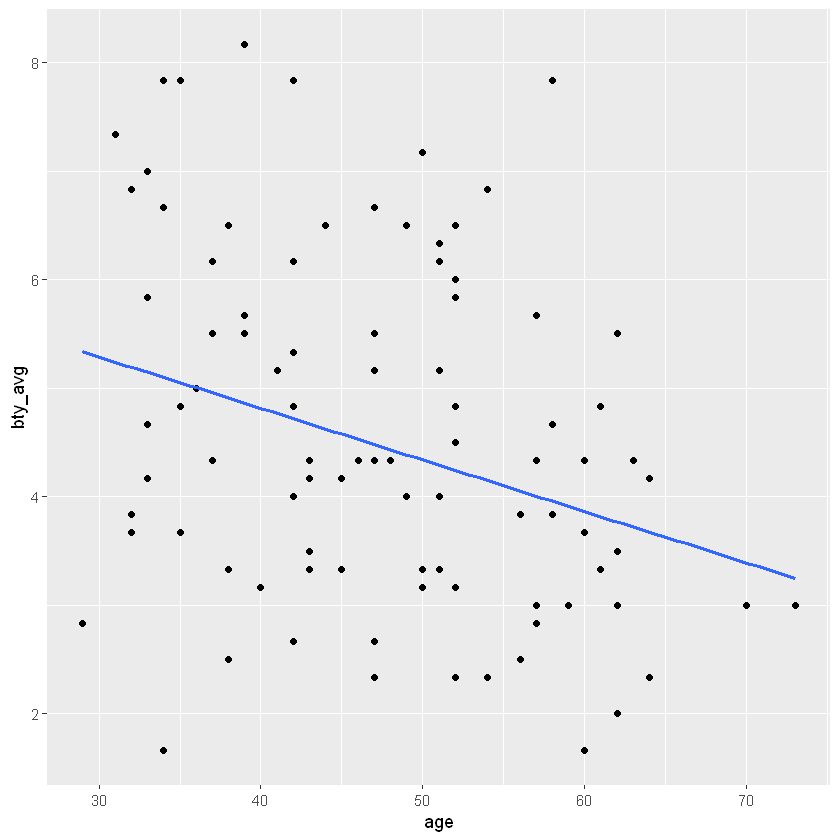

In [5]:
ggplot(aes(x=age, y=bty_avg), data=evals) + 
    geom_point() + 
    stat_smooth(method='lm', se=FALSE)

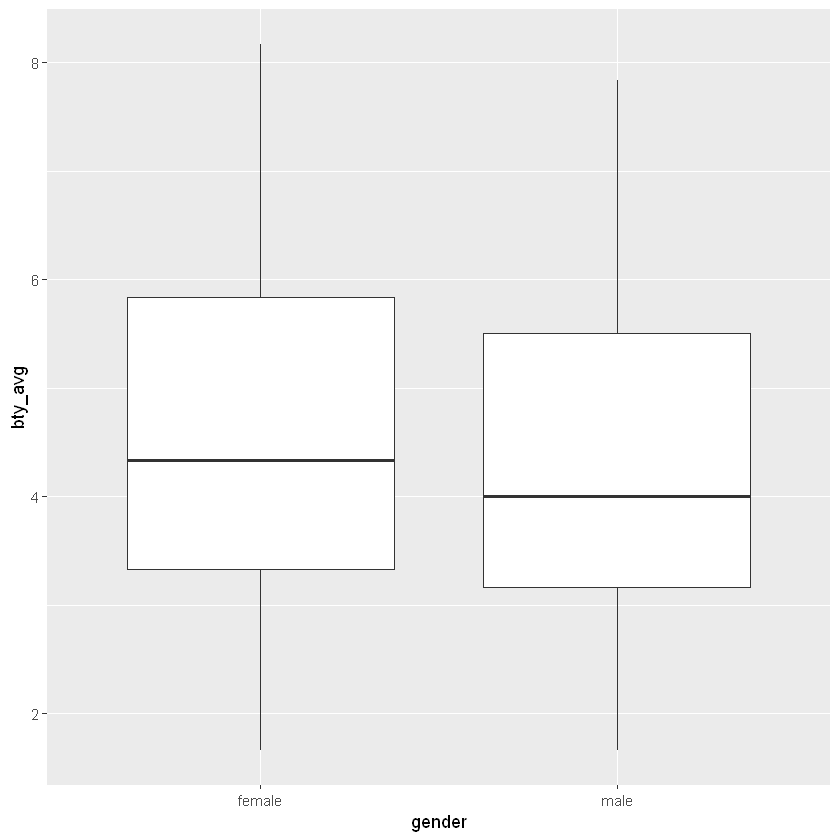

In [6]:
ggplot(aes(x=gender, y=bty_avg), data=evals) + 
    geom_boxplot()

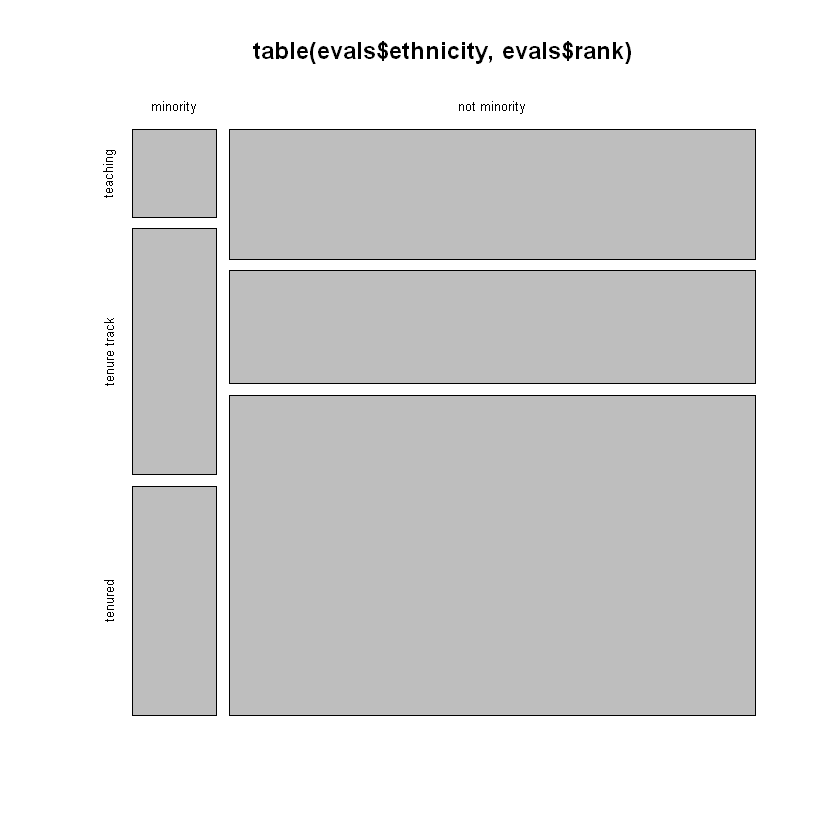

In [7]:
plot(table(evals$ethnicity, evals$rank))

## Simple Linear Regression

The fundamental phenomenon suggested by the study is that better looking teachers are evaluated more favorably. Let's create a scatterplot to see if this appears to be the case:

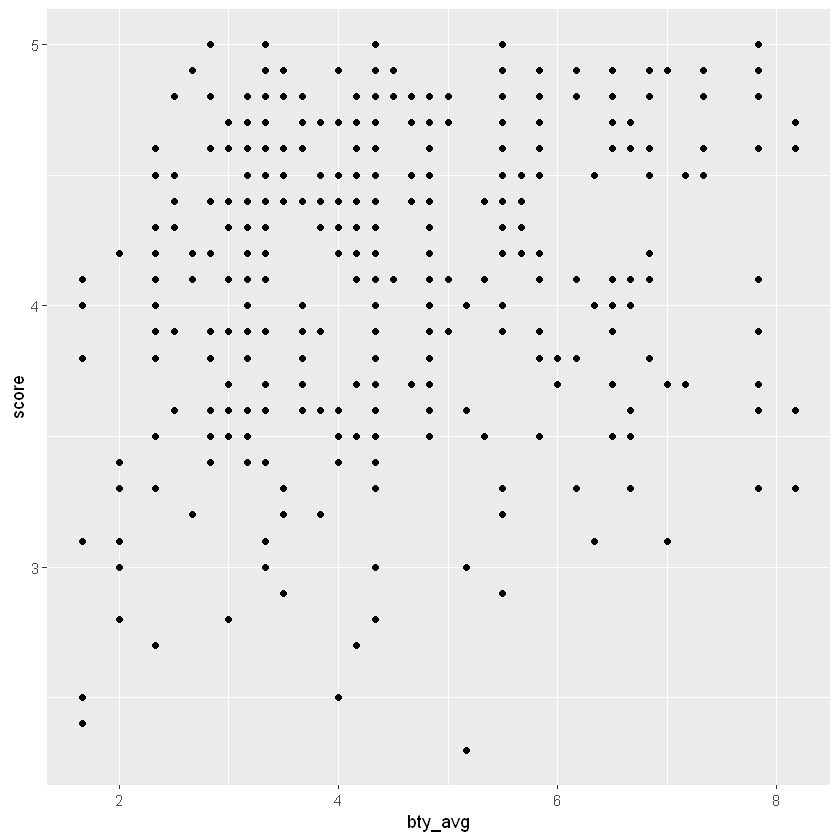

In [8]:
ggplot(data = evals, aes(x = bty_avg, y = score)) +
  geom_point()

Before we draw conclusions about the trend, compare the number of observations in the data frame with the approximate number of points on the scatterplot. Is anything awry?

**Exercise:** Replot the scatterplot, but this time replace the `geom_point()` layer with a `geom_jitter()` layer. (Use `?geom_jitter` to learn more.)  What was misleading about the initial scatterplot?

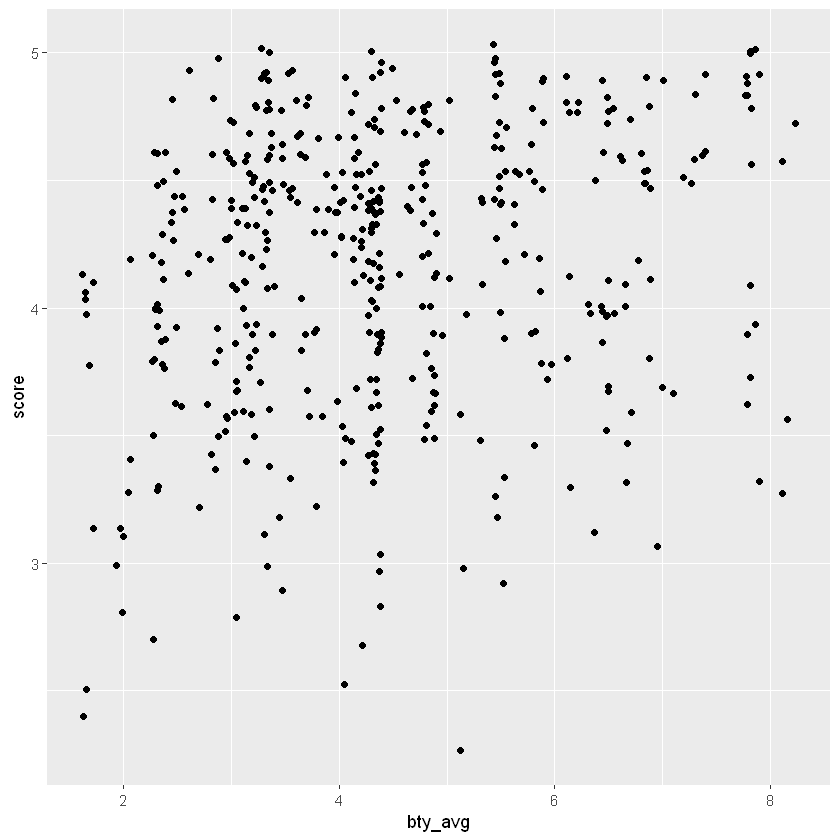

In [9]:
ggplot(aes(x=bty_avg, y=score), data=evals)+
    geom_jitter()

Let's see if the apparent trend in the plot is something more than natural variation.  Fit a linear model called `m_bty` to predict average professor score by average beauty rating and add the line to your plot using the following. If you do not remember how to do this, refer to the previous lab.

`geom_smooth()` using formula 'y ~ x'



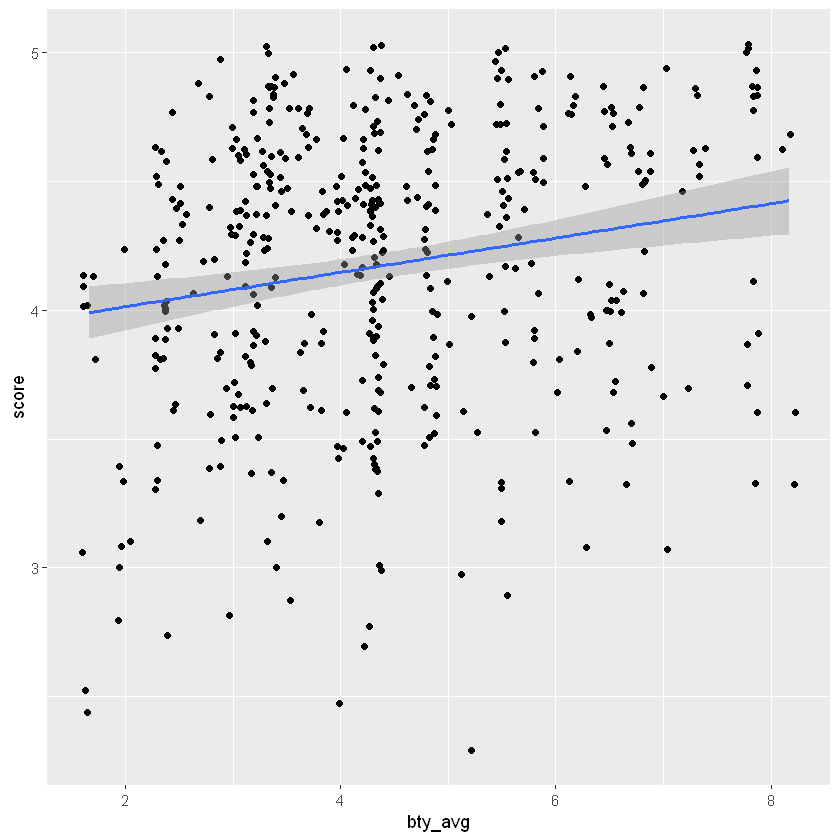

In [10]:
ggplot(data = evals, aes(x = bty_avg, y = score)) +
  geom_jitter() +
  geom_smooth(method = "lm")

The blue line is the model. The shaded gray area around the line tells us about the variability we might expect in our predictions. To turn that off, use `se = FALSE`.

`geom_smooth()` using formula 'y ~ x'



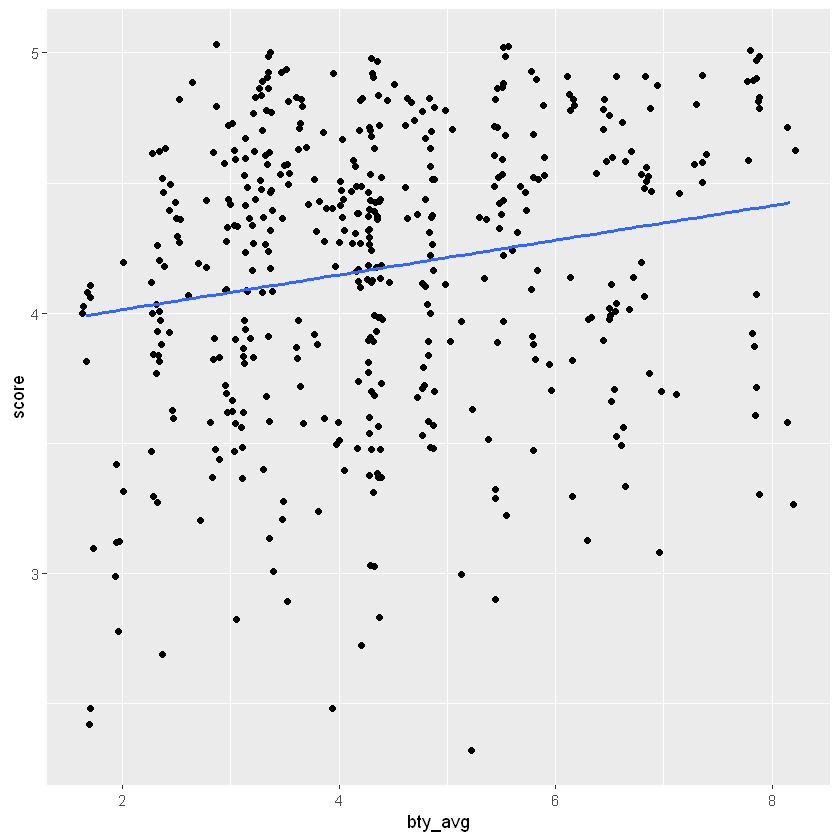

In [11]:
ggplot(data = evals, aes(x = bty_avg, y = score)) +
  geom_jitter() +
  geom_smooth(method = "lm", se = FALSE)

**Exercise:** Print a summary of the linear model, write out the equation, and interpret the slope.

In [12]:
m_bty <- lm(score ~ bty_avg, data=evals)

summary(m_bty)


Call:
lm(formula = score ~ bty_avg, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9246 -0.3690  0.1420  0.3977  0.9309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.88034    0.07614   50.96  < 2e-16 ***
bty_avg      0.06664    0.01629    4.09 5.08e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5348 on 461 degrees of freedom
Multiple R-squared:  0.03502,	Adjusted R-squared:  0.03293 
F-statistic: 16.73 on 1 and 461 DF,  p-value: 5.083e-05


**4. Average beauty score is a statistically significant predictor of evaluation score.**

    Answer: True.

**5. Use residual plots to evaluate whether the conditions of least squares regression are reasonable.  Which of the following statements is an `correct` analysis of the residual plots and conditions?**

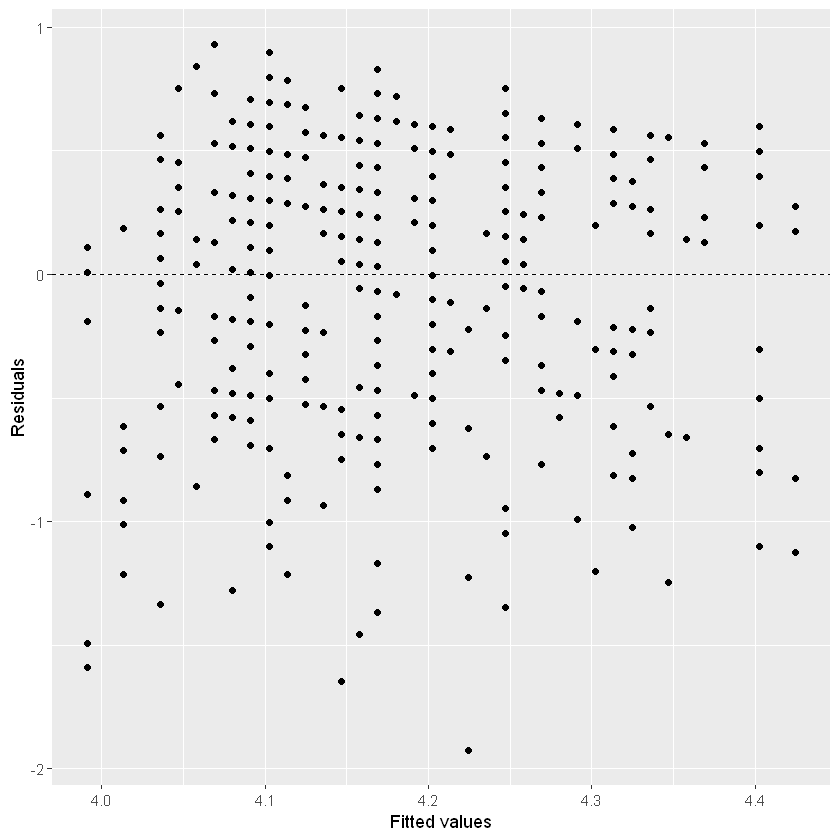

In [13]:
ggplot(data = m_bty, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

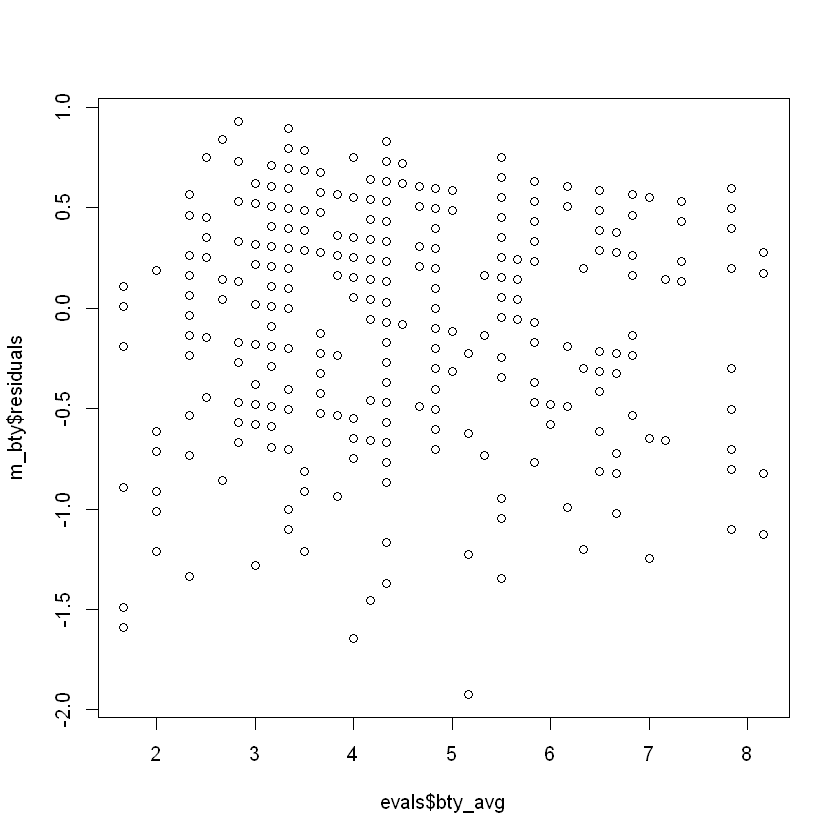

In [14]:
plot(m_bty$residuals ~ evals$bty_avg)

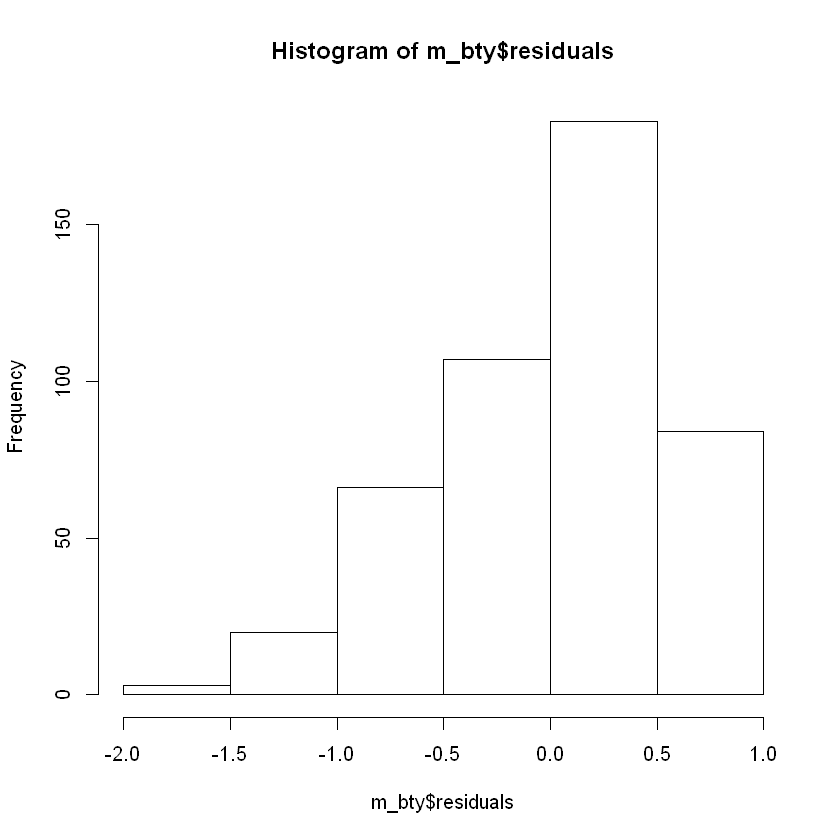

In [15]:
hist(m_bty$residuals)

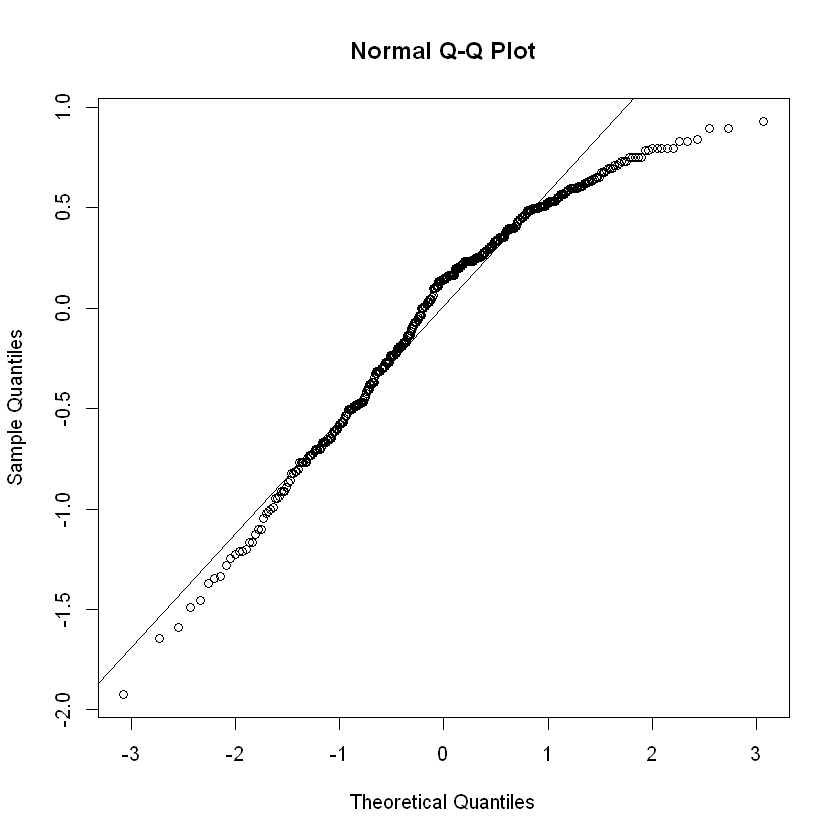

In [16]:
qqnorm(m_bty$residuals)
qqline(m_bty$residuals)

Answer:

    Linear association: The residuals plot shows a random scatter.
    Constant variance of residuals: No fan shape in residuals plot.
    Independent observations: Classes sampled randomly, no order effect.

## Multiple Linear Regression

The data set contains several variables on the beauty score of the professor: individual ratings from each of the six students who were asked to score the physical appearance of the professors and the average of these six scores. Let's take a look at the relationship between one of these scores and the average beauty score.

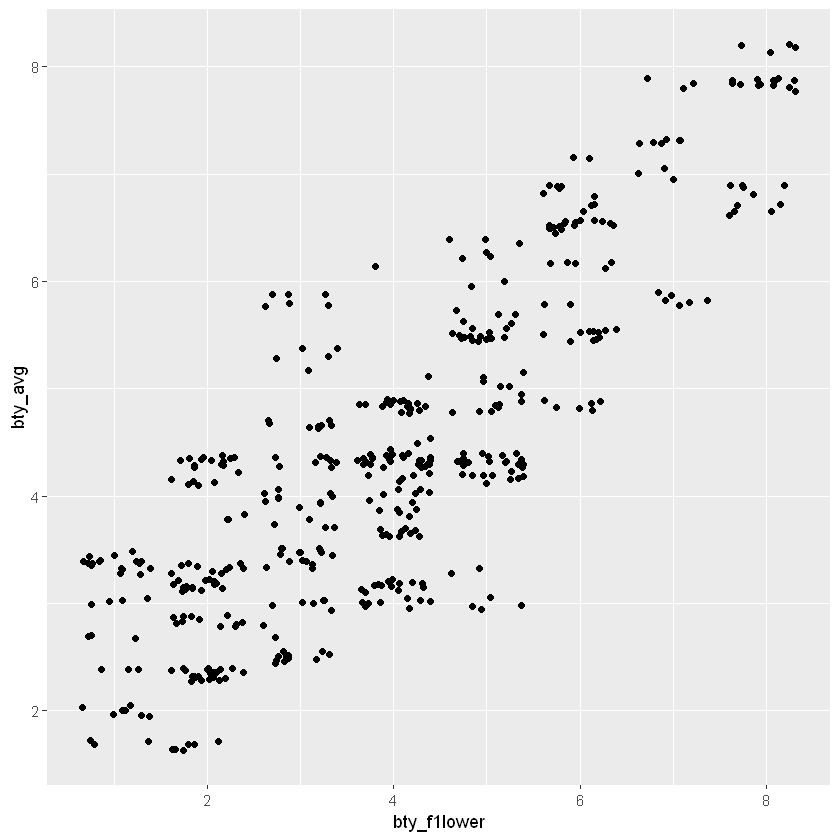

In [17]:
ggplot(data = evals, aes(x = bty_f1lower, y = bty_avg)) +
  geom_jitter()

In [18]:
evals %>% 
  summarise(cor(bty_avg, bty_f1lower))

"cor(bty_avg, bty_f1lower)"
<dbl>
0.8439112


As expected the relationship is quite strong - after all, the average score is calculated using the individual scores. We can actually take a look at the relationships between all beauty variables (columns 13 through 19) using the following command:

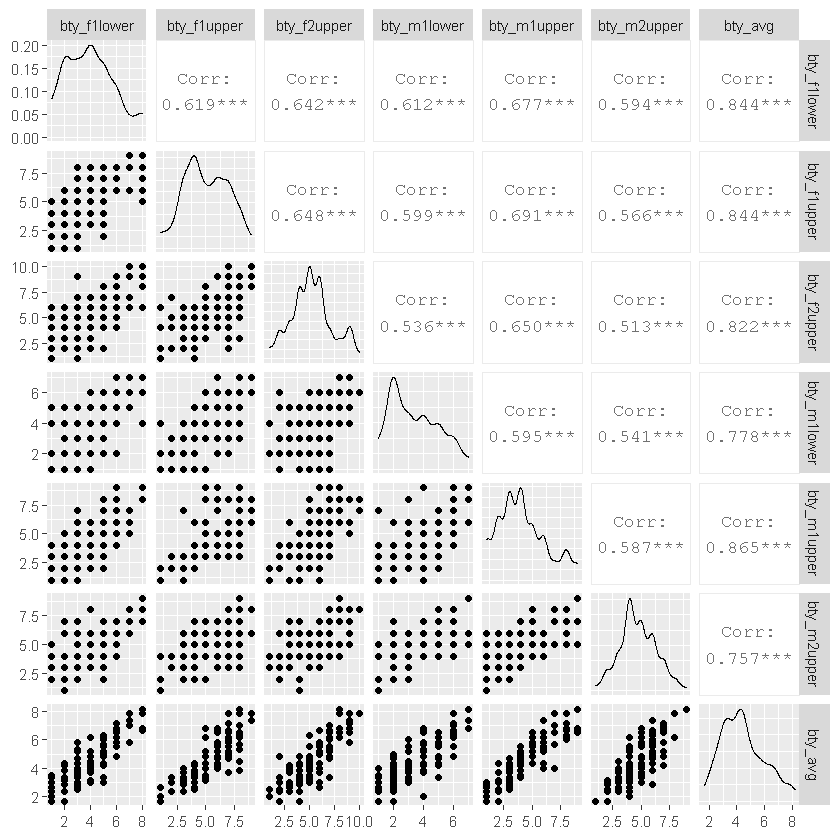

In [19]:
ggpairs(evals, columns = 13:19)

These variables are collinear (correlated), and adding more than one of these variables to the model would not add much value to the model. In this application and with these highly-correlated predictors, it is reasonable to use the average beauty score as the single representative of these variables.

In order to see if beauty is still a significant predictor of professor score after we've accounted for the gender of the professor, we can add the gender term into the model.

In [20]:
m_bty_gen <- lm(score ~ bty_avg + gender, data = evals)

summary(m_bty_gen)


Call:
lm(formula = score ~ bty_avg + gender, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8305 -0.3625  0.1055  0.4213  0.9314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74734    0.08466  44.266  < 2e-16 ***
bty_avg      0.07416    0.01625   4.563 6.48e-06 ***
gendermale   0.17239    0.05022   3.433 0.000652 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5287 on 460 degrees of freedom
Multiple R-squared:  0.05912,	Adjusted R-squared:  0.05503 
F-statistic: 14.45 on 2 and 460 DF,  p-value: 8.177e-07


**6. P-values and parameter estimates should only be trusted if the conditions for the regression are reasonable. Using diagnostic plots, we can conclude that the conditions for this model are reasonable.**

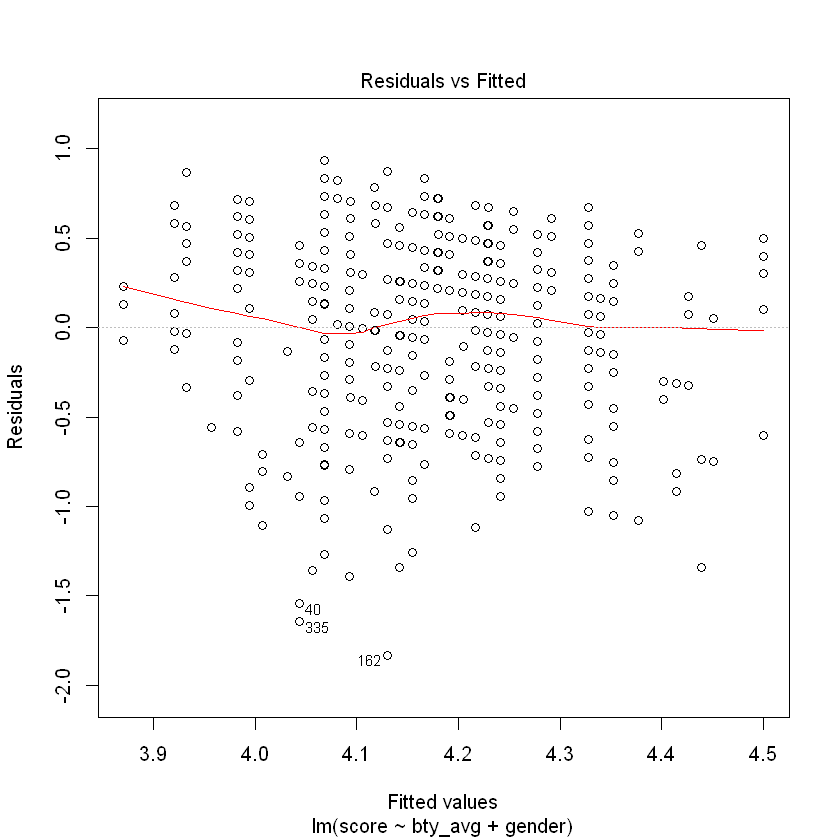

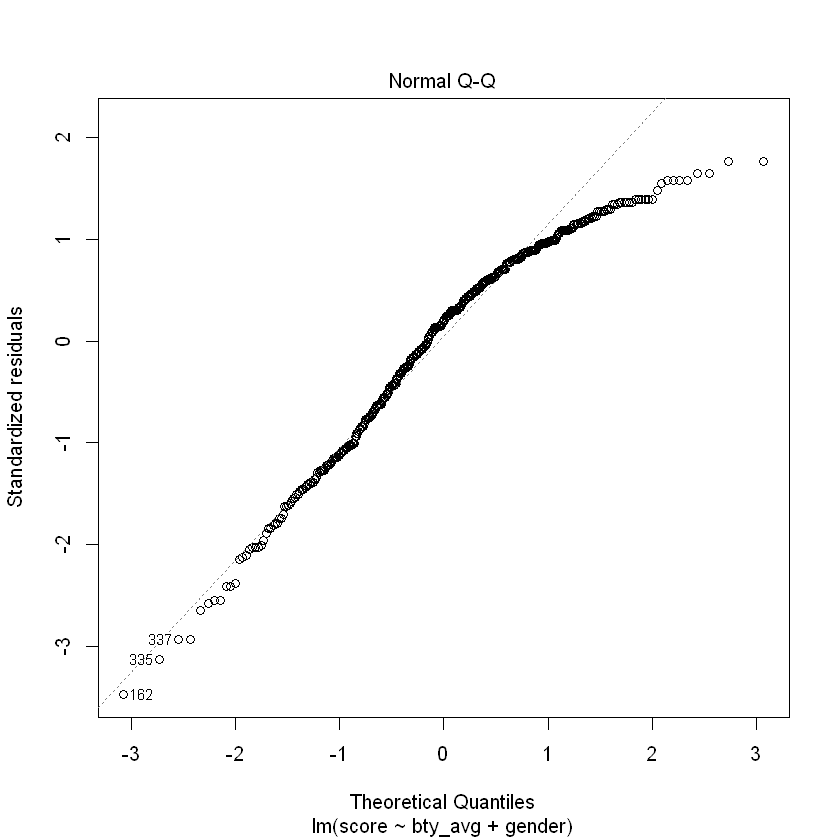

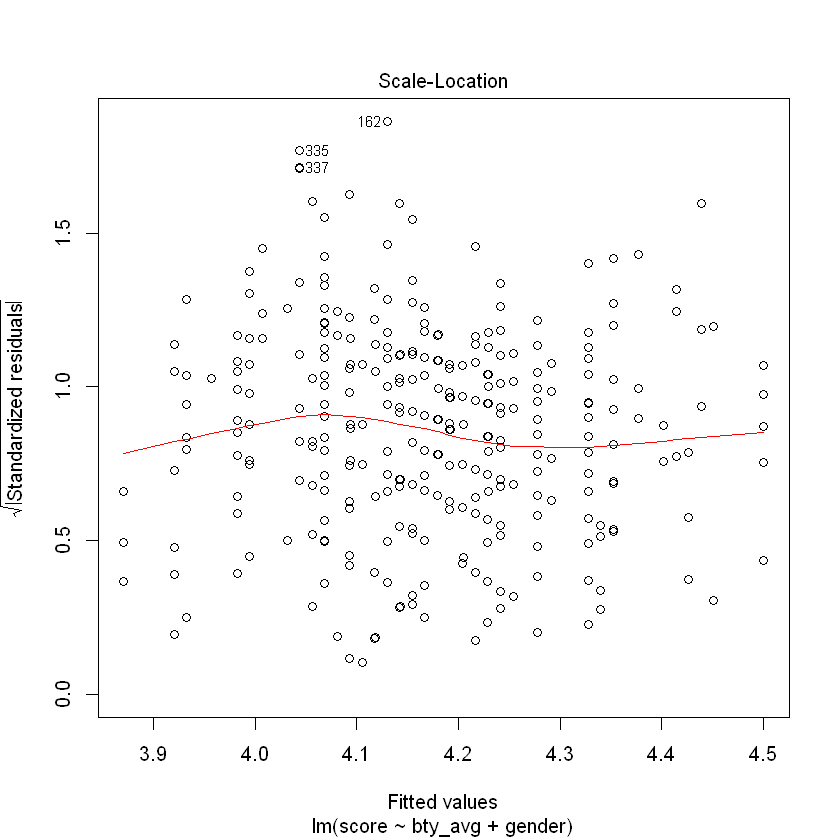

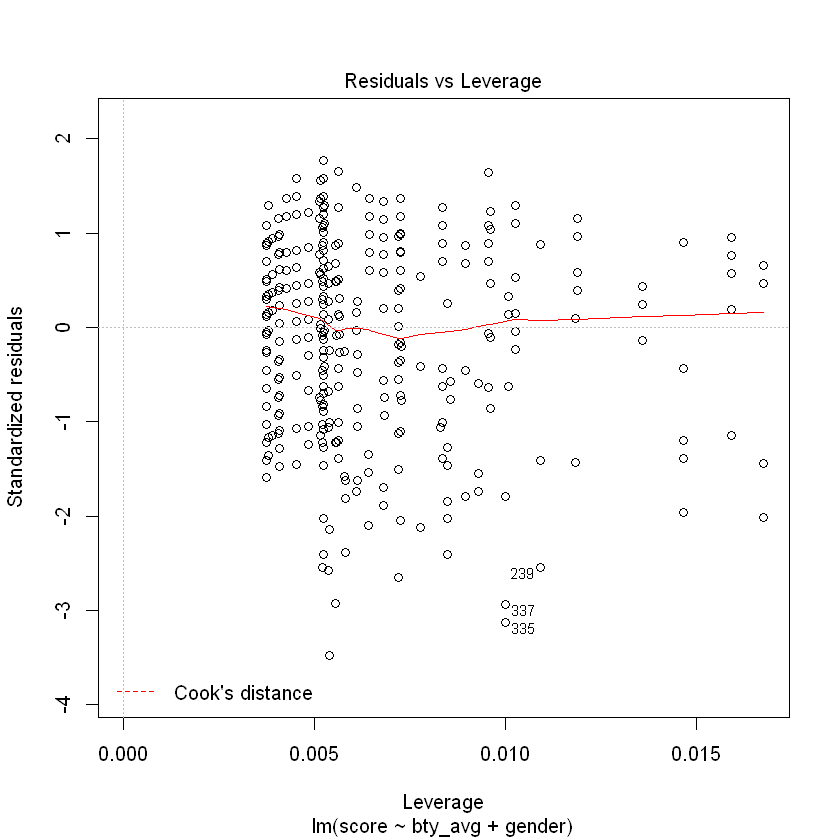

In [21]:
plot(m_bty_gen)

    Answer: True.

**Exercise:** Print a summary of the multiple linear regression model.  Is `bty_avg` still a significant predictor of `score`?  Has the addition of `gender` to the model changed the parameter estimate for `bty_avg`?

In [22]:
summary(m_bty_gen)


Call:
lm(formula = score ~ bty_avg + gender, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8305 -0.3625  0.1055  0.4213  0.9314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74734    0.08466  44.266  < 2e-16 ***
bty_avg      0.07416    0.01625   4.563 6.48e-06 ***
gendermale   0.17239    0.05022   3.433 0.000652 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5287 on 460 degrees of freedom
Multiple R-squared:  0.05912,	Adjusted R-squared:  0.05503 
F-statistic: 14.45 on 2 and 460 DF,  p-value: 8.177e-07


Answer:

lm(formula = score ~ bty_avg, data = evals) -> `bty_avg:` **5.08e-05**

lm(formula = score ~ bty_avg + gender, data = evals) -> `bty_avg:` **6.48e-06**

Note that the estimate for `gender` is now called `gendermale`. You'll see this 
name change whenever you introduce a categorical variable. The reason is that R 
recodes `gender` from having the values of `female` and `male` to being an 
indicator variable called `gendermale` that takes a value of $0$ for females and
a value of $1$ for males. (Such variables are often referred to as "dummy" 
variables.)

As a result, for females, the parameter estimate is multiplied by zero, leaving 
the intercept and slope form familiar from simple regression.

$$
  \begin{aligned}
\widehat{score} &= \hat{\beta}_0 + \hat{\beta}_1 \times bty\_avg + \hat{\beta}_2 \times (0) \\
&= \hat{\beta}_0 + \hat{\beta}_1 \times bty\_avg\end{aligned}
$$


**7. For two professors (one male and one female) who received the same beauty rating, the male professor is predicted to have the higher course evaluation score than the female.**

    Answer: True.

    femaleteatcher = 3.88034 + 0.06664*b1
    
    maleteacher = 3.74734 + 0.07416*b1 + 0.17239*b2

    So, maleteacher > femaleteacher.

The decision to call the indicator variable `gendermale` instead of`genderfemale`
has no deeper meaning. R simply codes the category that comes first 
alphabetically as a $0$. (You can change the reference level of a categorical 
variable, which is the level that is coded as a 0, using the`relevel` function. 
Use `?relevel` to learn more.)

**Exercise:** Create a new model called `m_bty_rank` with `gender` removed and 
`rank` added in.  How does R appear to handle categorical variables that have 
more than two levels? Note that the rank variable has three levels: teaching, 
tenure track, tenured.

In [23]:
m_bty_rank <- lm(score ~ bty_avg + rank, data=evals)

summary(m_bty_rank)


Call:
lm(formula = score ~ bty_avg + rank, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8713 -0.3642  0.1489  0.4103  0.9525 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.98155    0.09078  43.860  < 2e-16 ***
bty_avg           0.06783    0.01655   4.098 4.92e-05 ***
ranktenure track -0.16070    0.07395  -2.173   0.0303 *  
ranktenured      -0.12623    0.06266  -2.014   0.0445 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5328 on 459 degrees of freedom
Multiple R-squared:  0.04652,	Adjusted R-squared:  0.04029 
F-statistic: 7.465 on 3 and 459 DF,  p-value: 6.88e-05


**8. Which of the following is the correct order of the three levels of rank if we were to order them from lowest predicted course evaluation score to highest predicted course evaluation score?**

    Answer: Tenure Track, Tenured.

The interpretation of the coefficients in multiple regression is slightly 
different from that of simple regression. The estimate for `bty_avg` reflects
how much higher a group of professors is expected to score if they have a beauty
rating that is one point higher *while holding all other variables constant*. In
this case, that translates into considering only professors of the same rank 
with `bty_avg` scores that are one point apart.

## Prediction

Suppose we want to use the model we created earlier, `m_bty_gen` to predict 
the evaluation score for a professor, Dr. Hypo Thetical, who is a male tenure track
professor with an average beauty of 3.

If we wanted to do this by hand, we would simply plug in these values into the
linear model.

We can also calculate the predicted value in R.

First, we need to create a new data frame for this professor.

In [24]:
newprof <- data.frame(gender = "male", bty_avg = 3)

newprof

gender,bty_avg
<fct>,<dbl>
male,3


Note that I didn't need to add `rank = "tenure track"` to this data frame since
this variable is not used in our model.

Then, I can do the prediction using the `predict` function:

In [25]:
predict(m_bty_gen, newprof)

1 
4.142194

We can also construct a prediction interval around this prediction, which will
provide a measure of uncertainty around the prediction.

In [26]:
predict(m_bty_gen, newprof, interval = "prediction", level = 0.95)

,fit,lwr,upr
1,4.142194,3.100559,5.183829


Hence, the model predicts, with 95% confidence, that a male professor with an 
average beauty score of 3 is expected to have an evaluation score between 3.1 
and 5.18.

## The Search for the Best Model

We will start with a full model that predicts professor score based on rank, 
ethnicity, gender, language of the university where they got their degree, age, 
proportion of students that filled out evaluations, class size, course level, 
number of professors, number of credits, average beauty rating, outfit, and 
picture color.

Which variable would you expect to have the highest p-value in this model? Why? 

*Hint:* Think about which variable would you expect to not have any association 
with the professor score.

Let's run the model...

In [27]:
m_full <- lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_profs + 
             cls_credits + bty_avg + pic_outfit + pic_color, data = evals)

summary(m_full)


Call:
lm(formula = score ~ rank + ethnicity + gender + language + age + 
    cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + 
    bty_avg + pic_outfit + pic_color, data = evals)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77397 -0.32432  0.09067  0.35183  0.95036 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.0952141  0.2905277  14.096  < 2e-16 ***
ranktenure track      -0.1475932  0.0820671  -1.798  0.07278 .  
ranktenured           -0.0973378  0.0663296  -1.467  0.14295    
ethnicitynot minority  0.1234929  0.0786273   1.571  0.11698    
gendermale             0.2109481  0.0518230   4.071 5.54e-05 ***
languagenon-english   -0.2298112  0.1113754  -2.063  0.03965 *  
age                   -0.0090072  0.0031359  -2.872  0.00427 ** 
cls_perc_eval          0.0053272  0.0015393   3.461  0.00059 ***
cls_students           0.0004546  0.0003774   1.205  0.22896    
cls_levelupper         0.060514

**Exercise:** Check your suspicions from the previous exercise. Include the model output in your response.

    Answer: gendermale, cls_perc_eval, cls_creditsone credit are the most strong influencers. `Bty_avg` have some influence but we need to investigate the multicollinearity phenomenon.

**9. Which of the following is the correct intrepetation of the coefficient associated with the ethnicity variable. Non-minority professors are expected on average to score ...**

    Answer: 0.12 points higher than minority professors, all else held constant.

**Exercise:** Drop the variable with the highest p-value and re-fit the model. 
Did the coefficients and significance of the other explanatory variables change? 
(One of the things that makes multiple regression interesting is that coefficient 
estimates depend on the other variables that are included in the model.) If not, 
what does this say about whether or not the dropped variable was collinear with 
the other explanatory variables?

In [28]:
m_full2 <- lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_credits + 
              bty_avg + pic_outfit + pic_color, data = evals)

summary(m_full2)


Call:
lm(formula = score ~ rank + ethnicity + gender + language + age + 
    cls_perc_eval + cls_students + cls_level + cls_credits + 
    bty_avg + pic_outfit + pic_color, data = evals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7836 -0.3257  0.0859  0.3513  0.9551 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.0872523  0.2888562  14.150  < 2e-16 ***
ranktenure track      -0.1476746  0.0819824  -1.801 0.072327 .  
ranktenured           -0.0973829  0.0662614  -1.470 0.142349    
ethnicitynot minority  0.1274458  0.0772887   1.649 0.099856 .  
gendermale             0.2101231  0.0516873   4.065 5.66e-05 ***
languagenon-english   -0.2282894  0.1111305  -2.054 0.040530 *  
age                   -0.0089992  0.0031326  -2.873 0.004262 ** 
cls_perc_eval          0.0052888  0.0015317   3.453 0.000607 ***
cls_students           0.0004687  0.0003737   1.254 0.210384    
cls_levelupper         0.0606374  0.0575010   1.055 0

Now we try a different model selection method: adjusted $R^2$. Create a new model, 
`m1`, where you remove `rank` from the list of explanatory variables. Check out the 
adjusted $R^2$ of this new model and compare it to the adjusted $R^2$ of the full model.

In [29]:
m1 <- lm(score ~ ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_credits + 
                 bty_avg + pic_outfit + pic_color, data = evals)

summary(m1)$adj.r.squared

[1] 0.1604349

Then, try dropping the next variable from the full model (`ethnicity`):

In [30]:
m2 <- lm(score ~ gender + language + age + cls_perc_eval + cls_students + cls_level + cls_credits + bty_avg + pic_outfit + 
         pic_color, data = evals)

summary(m2)$adj.r.squared

[1] 0.1549314

**Exercise:** Repeat this process until you have tried removing each variable 
from the full model at a time, and determine removal of which variable yields 
the highest improvement in the adjusted $R^2$.

In [31]:
m3 <- lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + pic_outfit + pic_color, data = evals)

summary(m3)$adj.r.squared

[1] 0.1538113

In [32]:
m4 <- lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_credits + 
         bty_avg + pic_outfit + pic_color, data = evals)

summary(m4)$adj.r.squared

[1] 0.1634262

In [33]:
m5 <- lm(score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_level + cls_profs + cls_credits + bty_avg + 
         pic_outfit + pic_color, data = evals)

summary(m5)$adj.r.squared

[1] 0.1608651

In [34]:
m6 <- lm(score ~ ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + 
         bty_avg + pic_outfit + pic_color, data = evals)

summary(m6)$adj.r.squared

[1] 0.1587245

**10. Elimination of which variable from the full model yielded the highest adjusted R-squared?**

    Answer: cls_profs.

To complete the model selection we would continue removing variables one at a 
time until removal of another variable did not increase adjusted $R^2$.

**Exercise:** The original paper describes how these data were gathered by taking 
a sample of professors from the University of Texas at Austin and including all 
courses that they have taught.  Considering that each row represents a course, 
could this new information have an impact on any of the conditions of linear regression?

    Answer: Yes. Once students have access to this information, another type of bias can be generated.

**Exercise:** Based on your final model, describe the characteristics of a 
professor and course at University of Texas at Austin that would be associated 
with a high evaluation score.

    Answer: Male. The course with high percent of students in class who completed evaluation and have more number of credits of class.

**Exercise:** Would you be comfortable generalizing your conclusions to apply 
to professors generally (at any university)?  Why or why not?

    Answer: Yes. But we need to be cautious about the conclusions.